# Старт

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [31]:
import pandas as pd


# это личные функции, поэтому напишу для них документацию
# Строки из upload_google() использоваться будут не раз
# но не всегда совместно с функциями ниже, сделаем из них тоже функцию

def upload_google():
  """
  Функция импортирует модуль drive из пакета google.colab
  Для монтирования Google Drive. 
  """

  from google.colab import drive
  drive.mount('drive')


def load_result(name_table):
  """
  Функция создает объект DataFrame на основе имя заданной таблицы.

  Параметры:
  name_new_df (pandas DataFrame): Объект DataFrame, который будет создан на основе таблицы.
  name_table (str): Имя таблицы для загрузки без формата.

  Возвращает:
  pandas DataFrame: Созданный объект DataFrame.

  Пример использования:
  df = load_result(df, 'my_data')
  """
  name_table += ".csv" 
  name_new_df = pd.read_csv('drive/My Drive/' + name_table)
  # Задается ненужный столбец, избавляемся от него

  return name_new_df


Раздел от функций

In [ ]:
upload_google()  # подключая библиотеки и монтирую необходимое для работы гугл диска

X_train = load_result('5X_train')
X_valid = load_result('5X_valid')

y_train_log = pd.read_csv('drive/My Drive/5y_train_log.csv', usecols=['trip_duration_log'], squeeze=True)
y_valid_log = pd.read_csv('drive/My Drive/5y_valid_log.csv', usecols=['trip_duration_log'], squeeze=True)


In [33]:
# проверим, что y_train_log и y_valid_log считались нормально
print(y_train_log.shape, y_valid_log.shape)

(977016,) (481217,)


In [34]:
# Код, который запишет вывод ячейки в файл
import sys

# Сохраняем настройки вывода
start_stdout = sys.stdout

# Файл для записи
with open('output_new.txt', 'w') as f:
    # Перенаправление вывод в файл
    sys.stdout = f

    print("INFO о X_train")
    X_train.info()

    print("INFO о X_valid")
    X_valid.info()

    print("INFO о y_train_alog")
    y_train_log.info()

    print("INFO о y_valid_log")
    y_valid_log.info()


# Восстановление стандартного вывода
sys.stdout = start_stdout


Чтобы понять, что данные после пункта сохранения и загрузки одинаковые, сравним их информацию

/output_delete_train_data.txt это output.txt, но без train_data 


In [35]:
# Чтение файлов
file1 = '/content/output_delete_train_data.txt'
file2 = '/content/output_new.txt'

# Сравнение строк и вывод различающихся строк блоками
diff_blocks = []
current_block = []
with open(file1, 'r') as f1, open(file2, 'r') as f2:
    for line1, line2 in zip(f1, f2):
        if line1 != line2:
            current_block.extend([line1, line2])
        elif current_block:
            diff_blocks.append(current_block)
            current_block = []
    if current_block:
        diff_blocks.append(current_block)

# Вывод различающихся блоков строк
if diff_blocks:
    print("Различающиеся блоки строк:")
    for block in diff_blocks:
        print('--- Начало блока ---')
        print(''.join(block), end="")
        print('--- Конец блока ---\n\n')
else:
    print("Файлы идентичны")


Различающиеся блоки строк:
--- Начало блока ---
INFO о y_train_log
INFO о y_train_alog
--- Конец блока ---


--- Начало блока ---
Int64Index: 977016 entries, 293850 to 121958
RangeIndex: 977016 entries, 0 to 977015
--- Конец блока ---


--- Начало блока ---
memory usage: 14.9 MB
memory usage: 7.5 MB
--- Конец блока ---


--- Начало блока ---
Int64Index: 481217 entries, 452652 to 1108352
RangeIndex: 481217 entries, 0 to 481216
--- Конец блока ---


--- Начало блока ---
memory usage: 7.3 MB
memory usage: 3.7 MB
--- Конец блока ---




Как видим, поменялся только диапазон значений индекса, но число, и формат остался 

(memory usage это показатель внутренний, его не рассматриваем)  

#### **Начало обучения**

In [36]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train_log)

LinearRegression()

In [37]:
y_train_predict = linear_reg.predict(X_train)
print(f"y_train_predict: {y_train_predict}")

y_valid_predict = linear_reg.predict(X_valid)
print(f"y_valid_predict:  {y_valid_predict}")

y_train_predict: [5.95568658 6.16268592 6.0462479  ... 6.3518388  5.86173394 6.13939255]
y_valid_predict:  [5.89589845 5.83006925 5.51847212 ... 6.45654488 6.36247057 5.9961741 ]


### ***Функиция для рассёта RMSLE***

In [38]:
# функиция для рассёта RMSLE
def calculate_rmsle(y_true, y_pred):
    return round(metrics.mean_squared_error(y_true, y_pred, squared=False), 2)


In [39]:
# в другой ячейки, так как функцию будем вызывать ещё
print("RMSLE train:", calculate_rmsle(y_train_log, y_train_predict))
print("RMSLE valid:", calculate_rmsle(y_valid_log, y_valid_predict))


RMSLE train: 0.54
RMSLE valid: 0.54


# **5.2**

In [40]:
poly_features = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.fit_transform(X_valid)

linear_reg_poly = linear_model.LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train_log)

LinearRegression()

In [41]:
y_train_poly_predict = linear_reg_poly.predict(X_train_poly)
print(f"y_train_poly_predict: {y_train_poly_predict}")

y_valid_poly_predict = linear_reg_poly.predict(X_valid_poly)
print(f"y_valid_poly_predict: {y_valid_poly_predict}")


y_train_poly_predict: [5.71374486 6.16332982 6.09527562 ... 6.02062962 5.77386738 6.28747533]
y_valid_poly_predict: [5.80688451 5.35388158 4.69726536 ... 6.21855481 6.60430192 6.1030576 ]


In [42]:
print("RMSLE train_poly:", calculate_rmsle(y_train_log, y_train_poly_predict))
print("RMSLE train:", calculate_rmsle(y_valid_log, y_valid_poly_predict))


RMSLE train_poly: 0.47
RMSLE train: 0.7


# **Задание 5.3.**

In [43]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_poly, y_train_log)

y_train_ridge_predict = ridge.predict(X_train_poly)
print(f"y_train_ridge_predict: {y_train_ridge_predict}")

y_valid_ridge_predict = ridge.predict(X_valid_poly)
print(f"y_valid_ridge_predict: {y_valid_ridge_predict}")


y_train_ridge_predict: [5.71825642 6.22552776 6.11983477 ... 6.1526633  5.7245661  6.23726213]
y_valid_ridge_predict: [5.80850355 5.40719628 4.79239444 ... 6.21681268 6.53716055 6.07281515]


In [44]:
print("RMSLE train_ridge:", calculate_rmsle(y_train_log, y_train_ridge_predict))
print("RMSLE valid_ridge:", calculate_rmsle(y_valid_log, y_valid_ridge_predict))


RMSLE train_ridge: 0.48
RMSLE valid_ridge: 0.48


# **Задание 5.4**

In [45]:
detrreg = tree.DecisionTreeRegressor()
detrreg.fit(X_train, y_train_log)

y_train_detrreg_predict = detrreg.predict(X_train)
print(f"y_train_detrreg_predict: {y_train_detrreg_predict}")
y_valid_detrreg_predict = detrreg.predict(X_valid)
print(f"y_valid_ridge_predict: {y_valid_detrreg_predict}")

print()
print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_detrreg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_detrreg_predict))


y_train_detrreg_predict: [6.2441669  6.03308622 5.56068163 ... 5.97635091 5.12989871 6.3851944 ]
y_valid_ridge_predict: [5.91889385 5.6167711  5.92157842 ... 6.31716469 7.01929665 6.76041469]
RMSLE train_detrreg: 0.0
RMSLE valid_detrreg: 0.57


# **Задание 5.5**

In [58]:
def calculate_rmsle_lists(max_depths,
                          X_train, y_train_log, X_valid, y_valid_log, 
                          y_train_detrreg_predict, y_valid_detrreg_predict):
  
    rmsle_train_list = []
    rmsle_valid_list = []

    for max_depth in max_depths:
      detrreg = tree.DecisionTreeRegressor(max_depth=max_depth)
      detrreg.fit(X_train, y_train_log)

      y_train_detrreg_predict = detrreg.predict(X_train)
      y_valid_detrreg_predict = detrreg.predict(X_valid)

      rmsle_detrreg_train = metrics.mean_squared_error(
          y_train_log,
          y_train_detrreg_predict,
          squared=False
      )

      rmsle_detrreg_valid = metrics.mean_squared_error(
          y_valid_log,
          y_valid_detrreg_predict,
          squared=False
      )

      rmsle_train_list.append(rmsle_detrreg_train)
      rmsle_valid_list.append(rmsle_detrreg_valid)

    return rmsle_train_list, rmsle_valid_list

In [59]:
max_depths = range(7, 20)

rmsle_train_list, rmsle_valid_list = calculate_rmsle_lists(
    max_depths,
    X_train, y_train_log, X_valid, y_valid_log,
    y_train_detrreg_predict, y_valid_detrreg_predict
    )


In [73]:
print(rmsle_train_list[0:5])
print(rmsle_valid_list[0:5])

[0.44482226301161487, 0.43700130201443466, 0.4299042241204146, 0.422413531725487, 0.41457242069973166]
[0.4471739545494092, 0.44078044168485103, 0.4356631818042404, 0.43174826589244747, 0.43093971043896007]


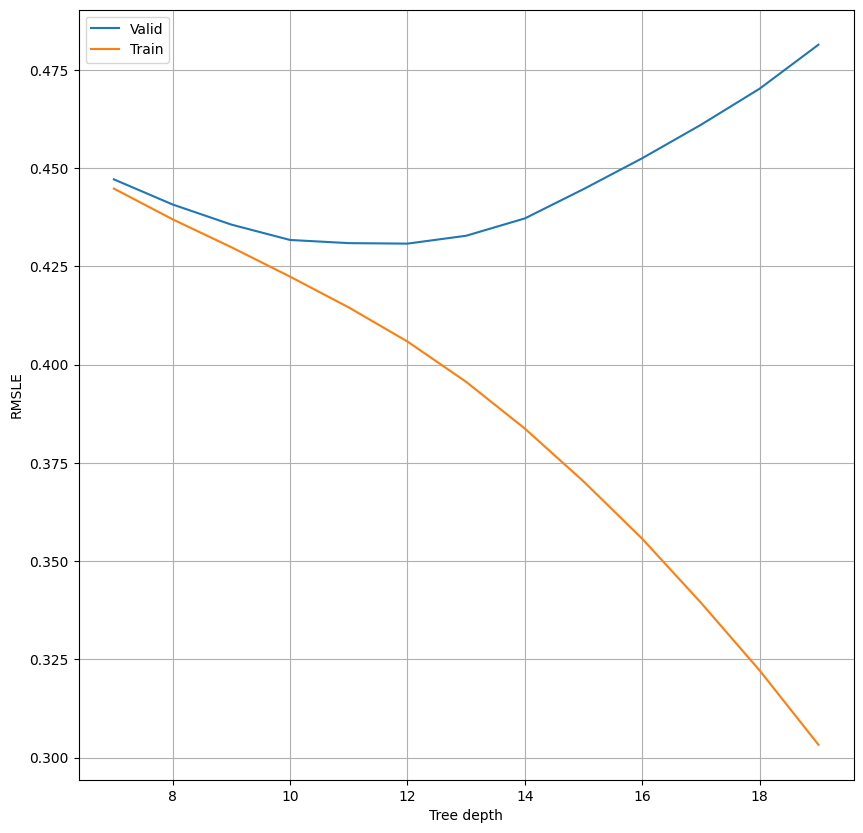

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Tree depth")
ax.set_ylabel("RMSLE")
ax.grid()

plt.plot(max_depths, rmsle_valid_list, label="Valid")
plt.plot(max_depths, rmsle_train_list, label="Train")


plt.legend()
plt.show()


Обучаем на оптимальной глубене в **12** 

In [70]:
detrreg = tree.DecisionTreeRegressor(max_depth=12)
detrreg.fit(X_train, y_train_log)

y_train_detrreg_predict = detrreg.predict(X_train)
y_valid_detrreg_predict = detrreg.predict(X_valid)

print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_detrreg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_detrreg_predict))

RMSLE train_detrreg: 0.41
RMSLE valid_detrreg: 0.43


# ***6 раздел***

# **Задание 6.1.**

In [87]:
RF_reg = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True,
)
RF_reg.fit(X_train, y_train_log)


y_train_RF_reg_predict = RF_reg.predict(X_train)
y_valid_RF_reg_predict = RF_reg.predict(X_valid)


print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_RF_reg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_RF_reg_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 35.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSLE train_detrreg: 0.4
RMSLE valid_detrreg: 0.41


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.7s finished


# **ЗАДАНИЕ 6.2**

In [88]:
gradbost = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
    verbose=True,
)
gradbost.fit(X_train, y_train_log)


y_train_gradbost_predict = gradbost.predict(X_train)
y_valid_gradbost_predict = gradbost.predict(X_valid)


print("RMSLE train_gradbost:", calculate_rmsle(y_train_log, y_train_gradbost_predict))
print("RMSLE valid_gradbost:", calculate_rmsle(y_valid_log, y_valid_gradbost_predict))

      Iter       Train Loss   Remaining Time 
         1           0.3110           15.27m
         2           0.2247           14.65m
         3           0.1987           14.63m
         4           0.1876           14.55m
         5           0.1823           14.45m
         6           0.1783           14.35m
         7           0.1756           14.22m
         8           0.1730           14.21m
         9           0.1709           14.57m
        10           0.1696           14.26m
        20           0.1577           12.45m
        30           0.1538           10.70m
        40           0.1502            9.09m
        50           0.1480            7.56m
        60           0.1451            6.02m
        70           0.1431            4.49m
        80           0.1410            2.99m
        90           0.1393            1.49m
       100           0.1383            0.00s
RMSLE train_gradbost: 0.37
RMSLE valid_gradbost: 0.39


# Задание 6.3.

без задания))

# **Задание 6.4**

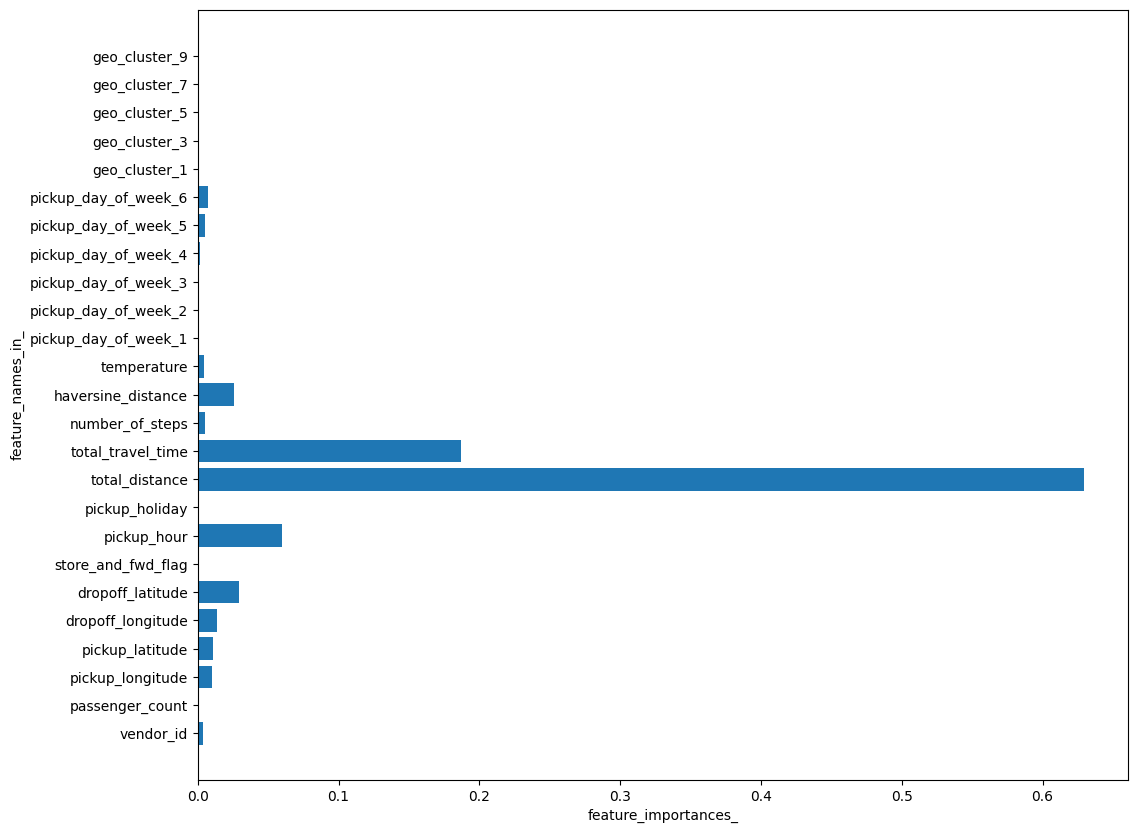

In [95]:
plt.figure(figsize=(12, 10))

plt.xlabel("feature_importances_")
plt.ylabel("feature_names_in_")

plt.barh(
    gradbost.feature_names_in_,
    gradbost.feature_importances_
)
plt.show()


total_distance, total_travel_time, pickup_hour

# ***ЗАДАНИЕ 6.5***

# **MeAE**

In [132]:
y_true = np.exp(y_train_log) - 1
y_pred = np.exp(y_train_gradbost_predict) - 1

MeAE = round(metrics.median_absolute_error(y_true, y_pred) / 60, 1)
print(f"MeAE в минутах: {MeAE}")

MeAE в минутах: 1.8


# **ДАЛЕЕ**

In [105]:
test_data = load_result('final/Project5_test_data')
osrm_data_test = load_result('final/Project5_osrm_data_test')


test_id = test_data['id']

# **!ЗАГРУЖАЮ ФУНКЦИИ И ПЕРЕМЕННЫЕ ИЗ ОСНОВНОГО КОЛЛАБА В РАЗНОБОЙ! **

In [110]:
def add_holiday_features(taxi, holidays):

    # Объединение таблиц по столбцу "pickup_date"
    merged_data = pd.merge(taxi, holidays, left_on='pickup_date', right_on='date', how='left')
    
    # Создание столбца "pickup_holiday" с бинарным признаком праздничного дня
    merged_data['pickup_holiday'] = merged_data['holiday'].notnull().astype(int)
    
    # Удаление ненужных столбцов
    merged_data = merged_data.drop(['date', 'holiday', 'day'], axis=1)
    
    return merged_data

In [111]:
holiday_data = pd.read_csv("drive/My Drive/holiday_data.csv", sep=';')
holiday_data['date'] = pd.to_datetime(holiday_data['date'])
holiday_data['date'] = holiday_data['date'].dt.date

In [108]:
columns_to_change = ["pickup_day_of_week", "geo_cluster", "events"]

In [112]:
def add_osrm_features(left_table, right_table, list_col):
  # тут новые имена таблиц, в отличии от предыдуущий функции
  # так как из-за старых имён я долго не мог понять проблему

  # Выделение столбцов из right_table
  right_table_subset = right_table[list_col]

  # Объединение left_table и right_table_subset по столбцу "id" с типом объединения "left"
  merged_data = pd.merge(left_table, right_table_subset, on='id', how='left')

  return merged_data

# лист с нужными нам столбцами, и id, по которыму будем мёржить
selected_columns = ['id', 'total_distance', 'total_travel_time', 'number_of_steps']

In [113]:
def add_geographical_features(df):
    pickup_lat = df["pickup_latitude"]
    pickup_lon = df["pickup_longitude"]
    dropoff_lat = df["dropoff_latitude"]
    dropoff_lon = df["dropoff_longitude"]
    
    df["haversine_distance"] = get_haversine_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
    df["direction"] = get_angle_direction(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
    
    return df

In [116]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [115]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((test_data[['pickup_latitude', 'pickup_longitude']],
                    test_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [114]:
# требуемая функция 
def add_cluster_features(df, hstack, name_col, model):
    coords = hstack
    df[name_col] = model.predict(coords)
    return df

In [118]:
def add_weather_features(left_df, right_df, what_merg, left_col_merg, right_col_merg):
    result = pd.merge(
        left=left_df,
        right=right_df[what_merg],
        how="left",
        left_on = left_col_merg,
        right_on = right_col_merg
    )
    return result

In [117]:
# загружаем данные
# я не использовал самописнаю функцию, так как там есть удаление столбца (позже поправил это)

weather_data = pd.read_csv('drive/My Drive/weather_data.csv')

weather_data["time"] = pd.to_datetime(weather_data["time"], format="%Y-%m-%d %H:%M:%S")

weather_data["date"] = weather_data["time"].dt.date
weather_data["hour"] = weather_data["time"].dt.hour
weather_data.head(1)

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,2


In [119]:
# тут функцию сложно в дальнейшем применить, поэтому col зашил в функции
def fill_null_weather_data(df):
    columns_to_fill = ["temperature", "visibility", "wind speed", "precip"]

    df[columns_to_fill] = df[columns_to_fill].fillna(df.groupby("pickup_date")[columns_to_fill].transform("median"))
    df["events"] = df["events"].fillna("None")
    return df


In [122]:
one_hot_encoder = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore')

In [121]:
def add_datetime_features(taxi_data):
    # Создание столбца "pickup_date" с датой включения счетчика/началом поездки (без времени)
    taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date

    # Создание столбца "pickup_hour" с часом включения счетчика
    taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour

    # Создание столбца "pickup_day_of_week" с днем недели
    taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek

    return taxi_data


In [124]:
f_regression = feature_selection.f_regression

choice_of_fitch = feature_selection.SelectKBest(score_func=f_regression, k=25)

choice_of_fitch_fit = choice_of_fitch.fit(X_train, y_train_log)

best_features = choice_of_fitch_fit.get_feature_names_out()

print(f"Число отобранных столбцов: {(len(best_features))}; и их имена: ")
print(best_features)

Число отобранных столбцов: 25; и их имена: 
['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


In [125]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

# **!НАЧАЛО ОБРАБОТКИ!**

In [131]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test, selected_columns)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, coords, "geo_cluster", kmeans)

columns = [
    "temperature",
    "visibility",
    "wind speed",
    "precip",
    "events",
    "date",
    "hour"
]

left_col_mrg = ["pickup_date", "pickup_hour"]
right_col_mrg = ["date", "hour"]

test_data = add_weather_features(test_data, weather_data, columns, left_col_mrg, right_col_mrg)

test_data.drop(["date", "hour"], axis=1, inplace=True)

test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [134]:
test_data.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,...,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,id3004672,0,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,id3505355,0,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016-06-30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,id1217141,0,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016-06-30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,id2150126,1,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016-06-30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,id1598245,0,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016-06-30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [138]:
def save_result(name_old_df, name_table):
  """
  Функция сохраняет pandas DataFrame в таблицу формата .csv.

  Параметры:
  name_old_df (pandas DataFrame): DataFrame, который  будет преобразован в таблицу.
  name_table (str): Имя таблицы без формата.

  Пример использования:
  save_result(df, 'my_data')
  """

  name_table += ".csv"
  name_old_df.to_csv(name_table, sep=',' , index=False)
  !cp {name_table} "drive/My Drive/"

In [146]:
save_result(test_data, 'test_data_colab')
save_result(X_test, 'X_test_colab')

np.save('X_test_scaled_colab.npy', X_test_scaled)
!cp 'X_test_scaled_colab.npy' "drive/My Drive/"

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [163]:
X_test_end = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [164]:
y_test_predict_end = gradbost.predict(X_test_end)

In [165]:
y_test_predict = np.exp(y_test_predict_end) - 1

# Выгрузка результата

In [166]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb.csv', index=False)